In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 22 10:32:06 2022

@author: Luigi Portinale
"""
## load the libraries 
import matplotlib.pyplot as plt
from keras.api.layers import Dense, Input
from keras.api.models import Model
from keras.api.callbacks import EarlyStopping

### read dataset 
from keras.api.datasets import fashion_mnist as dataset
(train_x, _), (test_x, _) = dataset.load_data()

## normalize and reshape the predictors
train_x = train_x / 255
train_x = train_x.reshape(-1, 784)
test_x = test_x / 255
test_x = test_x.reshape(-1, 784)

#Create Autoencoder architecture
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='relu')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='sigmoid')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

#Print summary
model.summary()

#train the model with early stopping callback.
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=10, batch_size=500, validation_split=0.2, callbacks=[early_stopping])


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1500)           │     1,177,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1000)           │     1,501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 500)            │         5,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1000)           │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1500)           │     1,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 784)            │     1,176,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,368,794 (24.30 MB)

 Trainable params: 6,368,794 (24.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1327 - val_loss: 0.0394
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0367 - val_loss: 0.0283
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - val_loss: 0.0244
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0246 - val_loss: 0.0228
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0223 - val_loss: 0.0217
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0213 - val_loss: 0.0203
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0200 - val_loss: 0.0199
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - val_loss: 0.0188
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - val_loss: 0.0177


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 640x480 with 0 Axes>

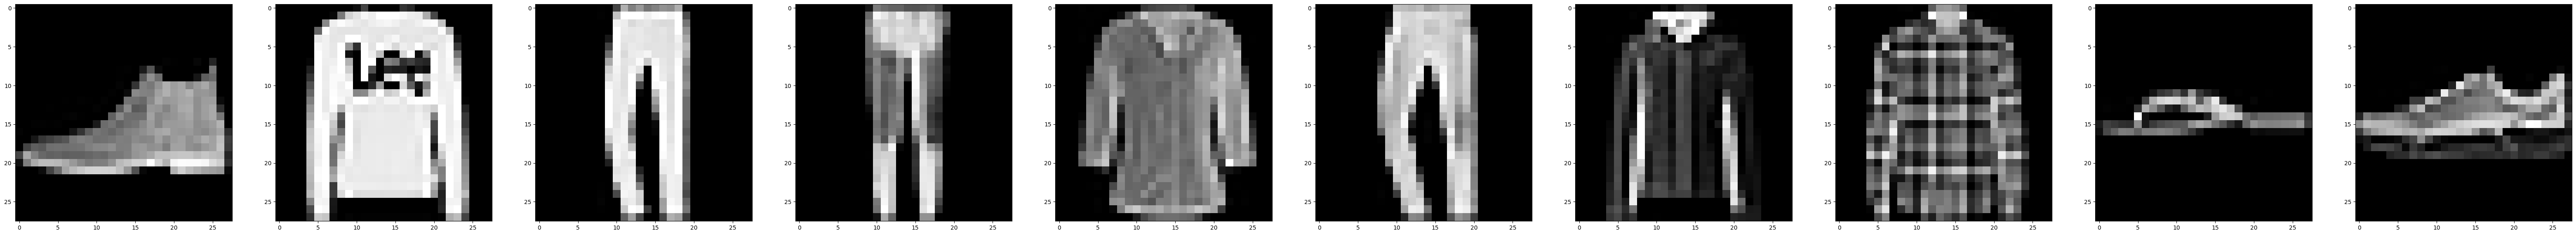

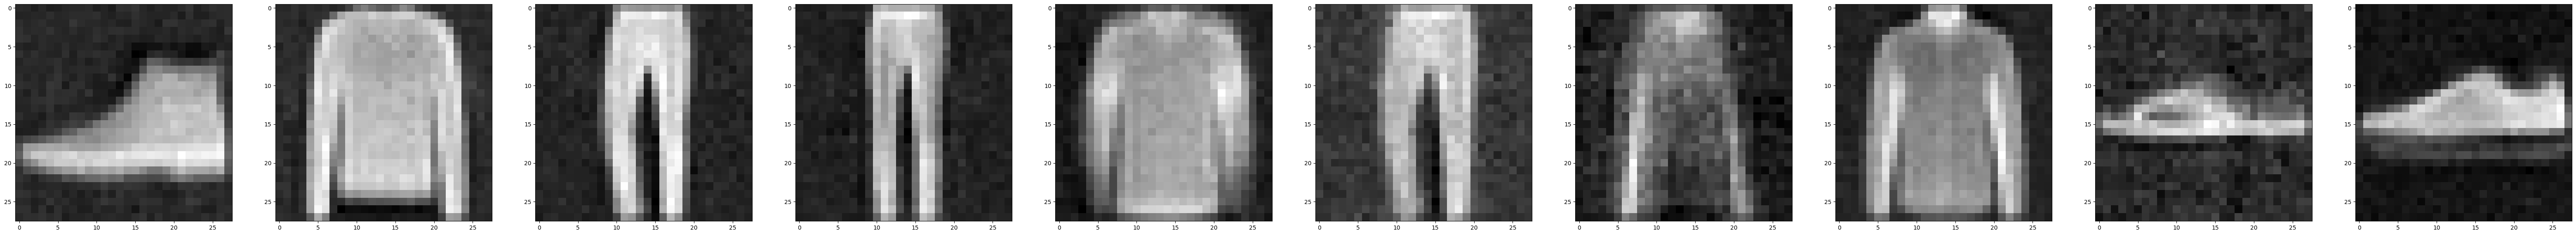

In [9]:
# predictions
totals = 10
preds = model.predict(test_x)

plt.gray()
# Actual images
f, ax = plt.subplots(1,totals)
f.set_size_inches(80, 40)
for i in range(totals):
    ax[i].imshow(test_x[i].reshape(28, 28))
plt.show()

# Output images
f, ax = plt.subplots(1,totals)
f.set_size_inches(80, 40)
for i in range(totals):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()
